In [1]:
# Task 1 Plotting the Distribution and Removing the Outliers

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# importing the data into variables
paid_0_2021=pd.read_csv('minutes_watched_2021_paid_0.csv')
paid_0_2022=pd.read_csv('minutes_watched_2022_paid_0.csv')
paid_1_2021=pd.read_csv('minutes_watched_2021_paid_1.csv')
paid_1_2022=pd.read_csv('minutes_watched_2022_paid_1.csv')

In [4]:
#Displaying the 5 rows of different variables
print(paid_0_2021.head(5)), print('\n')
print(paid_0_2022.head(5)), print('\n')
print(paid_1_2021.head(5)), print('\n')
print(paid_1_2022.head(5)), print('\n')

   student_id  minutes_watched  years  paid_in_q2
0          66             0.72   2021           0
1         132            71.92   2021           0
2         560             1.37   2021           0
3         606            18.12   2021           0
4         615            18.93   2021           0


   student_id  minutes_watched  years  paid_in_q2
0          67            27.03   2022           0
1         560             1.22   2022           0
2        1520             2.10   2022           0
3        1907             4.68   2022           0
4        2759             0.25   2022           0


   student_id  minutes_watched  years  paid_in_q2
0           6            81.03   2021           1
1         221           469.07   2021           1
2         516            46.27   2021           1
3         520            91.18   2021           1
4         523          1322.25   2021           1


   student_id  minutes_watched  years  paid_in_q2
0           6            67.08   2022       

(None, None)

[Text(0.5, 1.0, 'Paid-Plan Students for Q2 2021')]

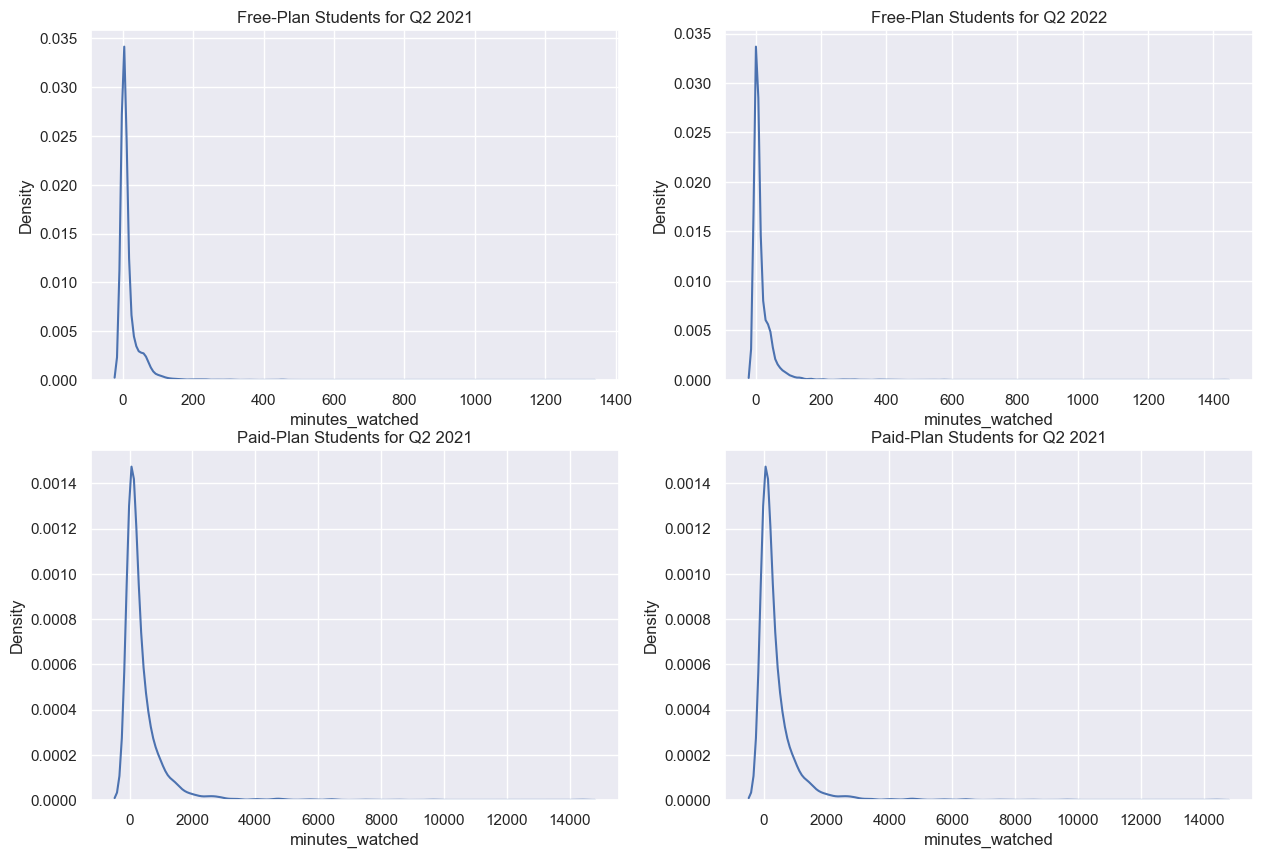

In [5]:
# Plotting the minutes_watch field from different variables
fig, axes = plt.subplots(2, 2, figsize =(15,10))
sns.kdeplot(paid_0_2021['minutes_watched'],ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(paid_0_2022['minutes_watched'],ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(paid_1_2021['minutes_watched'],ax = axes[1, 0]).set(title = 'Paid-Plan Students for Q2 2021')
sns.kdeplot(paid_1_2021['minutes_watched'],ax = axes[1, 1]).set(title = 'Paid-Plan Students for Q2 2021')

In [6]:
# Removing last 1% from the minutes_watched field of all variables 
datasets = [paid_0_2021,paid_0_2022,paid_1_2021,paid_1_2022]

filtered_datasets = []

for df in datasets:
    threshold = df['minutes_watched'].quantile(0.99)  # Calculate the 99th percentile
    filtered_df = df[df['minutes_watched'] < threshold]  # Filter out the outliers
    filtered_datasets.append(filtered_df)

[Text(0.5, 1.0, 'Paid-Plan Students for Q2 2022')]

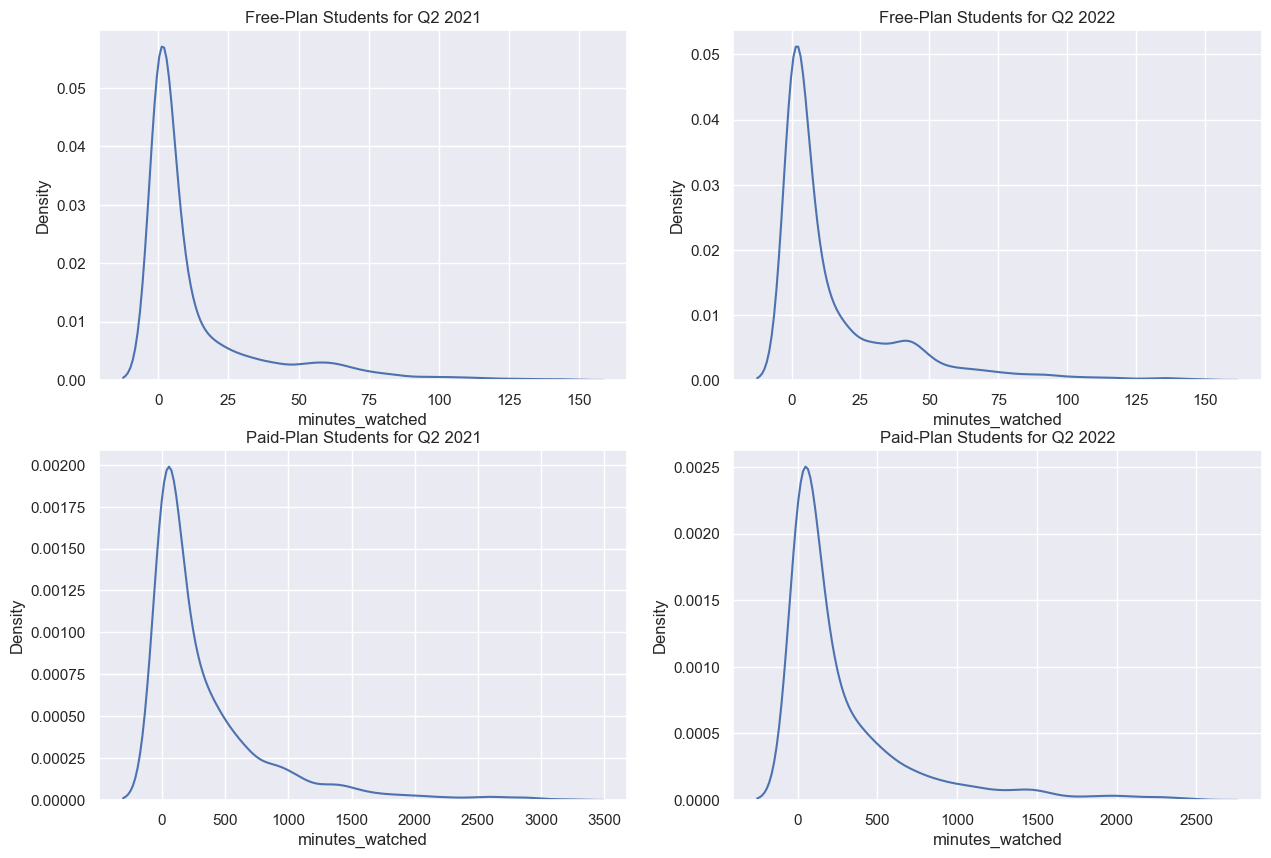

In [7]:
# Plotting minutes_watched after removing last 1% from minutes_watched
fig, axes = plt.subplots(2, 2,figsize =(15,10))
sns.kdeplot(filtered_datasets[0].minutes_watched,ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(filtered_datasets[1].minutes_watched,ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(filtered_datasets[2].minutes_watched,ax = axes[1, 0]).set(title = 'Paid-Plan Students for Q2 2021')
sns.kdeplot(filtered_datasets[3].minutes_watched,ax = axes[1, 1]).set(title = 'Paid-Plan Students for Q2 2022')

In [8]:
# exporting the filtered out data into csv
#filtered_datasets[3].to_csv('minutes_watched_2022_paid_1_no_outliers.csv',index=False)

In [9]:
# Task 2 Creating Linear Regression

In [10]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
# importing the data into variable and showing first 5 rows
minutes_and_certificates=pd.read_csv('minutes_and_certificates.csv')
minutes_and_certificates.head(5)

,student_id,certificates_issued,minutes_watched
0,4640,1,586.8000
1,5836,3,1903.1167
2,801,13,6066.0000
3,2022,1,115.3667
4,6278,2,2181.3167


In [12]:
# declaring dependent (y) and independent variables (x)
x=minutes_and_certificates['minutes_watched']
y=minutes_and_certificates['certificates_issued']

In [13]:
# splitting data into train, test by 80% on training and 20% on testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
# reshaping x_train and x_test and fitting into linear regression
model=LinearRegression()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
model.fit(x_train,y_train)

LinearRegression()

In [15]:
# Printing slope and intercept
print(f'slope={model.coef_}')
print(f'intercept={model.intercept_}')

slope=[0.00169285]
intercept=1.2238770001198926


In [16]:
# From above result we can say for every 1 min increase in minutes_watched the cerificate_issued will increase 0.0017 on avg

In [17]:
# Predicting x_test and finding r_squared value
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared value: {r_squared:.4f}")

R-squared value: 0.4549


In [18]:
# from the above result we can say model explains 45% of dependable variable variance

In [19]:
# Predicting certificates by taking 1200 as minutes_watched
minutes_input = np.array([[1200]])
predicted_certificates = model.predict(minutes_input)[0]
print(f"Predicted certificates for 1200 minutes watched: {round(predicted_certificates,2)}")

Predicted certificates for 1200 minutes watched: 3.26


Text(0, 0.5, 'Predicted Certificates')

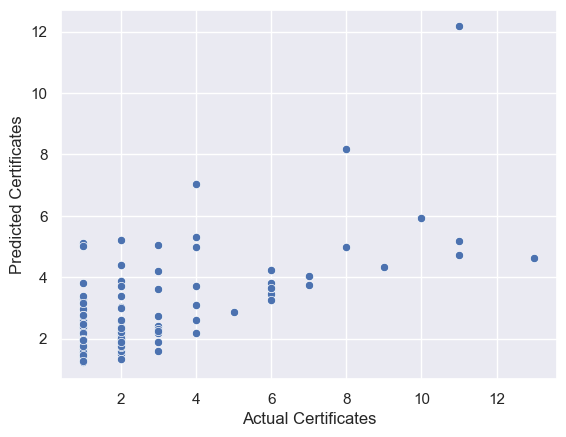

In [20]:
# Plotting y_test & y_pred
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual Certificates')
plt.ylabel('Predicted Certificates')